## Prediction of Therapeutic Effect of Music to Mental Health
Xaw9SRJz

mkdir data deliver develop src figures.

In [20]:
%%javascript
Ipython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import the neccessary library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
#sb.set();

%matplotlib inline
 
#Set print options
pd.set_option('display.max_columns', None, 'display.float_format', lambda x: '%.2f' % x)

#Loading Pivottable_UI
# from pivottablejs import pivot_ui 

In [3]:
# Loading our Dataset

df = pd.read_csv('mxmh_survey_results.csv')

## At this point we want to understand our data

In [23]:
# View the first 5 rows of the data
df.tail(20)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
716,10/5/2022 8:58:16,17.00,Spotify,1.00,No,No,No,Metal,Yes,Yes,137.00,Sometimes,Never,Never,Rarely,Never,Rarely,Rarely,Rarely,Sometimes,Rarely,Very frequently,Sometimes,Never,Rarely,Very frequently,Rarely,9.00,8.00,4.00,0.00,Improve,I understand.
717,10/5/2022 12:30:23,23.00,Spotify,2.00,No,No,No,Rock,Yes,Yes,120.00,Rarely,Never,Rarely,Rarely,Never,Sometimes,Never,Rarely,Rarely,Rarely,Very frequently,Sometimes,Sometimes,Sometimes,Very frequently,Never,5.00,7.00,10.00,2.00,No effect,I understand.
718,10/6/2022 3:35:11,17.00,Spotify,1.00,Yes,Yes,No,Metal,Yes,Yes,70.00,Rarely,Never,Rarely,Sometimes,Never,Never,Never,Never,Very frequently,Very frequently,Very frequently,Sometimes,Never,Never,Very frequently,Very frequently,8.00,3.00,9.00,2.00,No effect,I understand.
719,10/6/2022 9:17:46,22.00,Spotify,3.00,Yes,No,No,Video game music,Yes,Yes,150.00,Rarely,Rarely,Sometimes,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Rarely,Sometimes,Very frequently,Rarely,Rarely,Sometimes,Very frequently,10.00,10.00,6.00,8.00,Improve,I understand.
720,10/9/2022 22:15:59,17.00,Spotify,5.00,Yes,No,No,Hip hop,Yes,No,168.00,Rarely,Sometimes,Very frequently,Never,Sometimes,Very frequently,Never,Sometimes,Never,Sometimes,Rarely,Very frequently,Very frequently,Very frequently,Rarely,Rarely,7.00,7.00,5.00,5.00,Improve,I understand.
721,10/11/2022 15:46:46,19.00,Spotify,5.00,Yes,Yes,No,Pop,Yes,Yes,163.00,Very frequently,Sometimes,Rarely,Never,Rarely,Rarely,Rarely,Very frequently,Sometimes,Very frequently,Rarely,Very frequently,Rarely,Rarely,Sometimes,Rarely,10.00,8.00,1.00,0.00,Improve,I understand.
722,10/14/2022 18:01:12,19.00,Spotify,4.00,Yes,No,No,Pop,Yes,Yes,140.00,Sometimes,Rarely,Sometimes,Never,Never,Sometimes,Sometimes,Rarely,Rarely,Sometimes,Sometimes,Very frequently,Sometimes,Sometimes,Sometimes,Sometimes,8.00,6.00,2.00,0.00,Improve,I understand.
723,10/14/2022 20:42:26,16.00,Spotify,6.00,Yes,No,No,Pop,Yes,Yes,105.00,Rarely,Rarely,Sometimes,Rarely,Never,Very frequently,Sometimes,Very frequently,Very frequently,Rarely,Never,Very frequently,Very frequently,Very frequently,Never,Never,10.00,7.00,6.00,10.00,Improve,I understand.
724,10/15/2022 14:00:55,19.00,Spotify,6.00,Yes,No,No,Pop,Yes,Yes,78.00,Rarely,Rarely,Rarely,Never,Never,Sometimes,Sometimes,Sometimes,Rarely,Sometimes,Never,Very frequently,Rarely,Rarely,Rarely,Sometimes,6.00,6.00,8.00,0.00,Improve,I understand.
725,10/22/2022 15:20:29,13.00,Spotify,1.00,Yes,No,No,Video game music,Yes,No,128.00,Rarely,Sometimes,Never,Rarely,Never,Very frequently,Rarely,Rarely,Rarely,Very frequently,Very frequently,Very frequently,Never,Sometimes,Sometimes,Very frequently,10.00,10.00,8.00,4.00,Worsen,I understand.


## Quick overview

Notice the Age column is float datatype, we'll have to convert it to integer.

In [27]:
#Number of observations and features in our data

df.shape

(736, 33)

In [47]:
# Let's have a quick view of our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [5]:
# Check for missing value
df.isna().any().sum()

8

In [48]:
# Missing values in each feature
df.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [12]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [6]:
# We have to create a copy of our data and work with it
dfcopy= df

In [7]:
# Check the unique values in the features
dfcopy['Music effects'].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [27]:
dfcopy['Primary streaming service'].unique()

array(['Spotify', 'Pandora', 'YouTube Music',
       'I do not use a streaming service.', 'Apple Music',
       'Other streaming service', nan], dtype=object)

In [31]:
dfcopy['Instrumentalist'].unique()

array(['Yes', 'No', nan], dtype=object)

In [29]:
dfcopy['Foreign languages'].unique()

array(['Yes', 'No', nan], dtype=object)

In [30]:
dfcopy['Composer'].unique()

array(['Yes', 'No', nan], dtype=object)

## Treating for missing values for each feature.

In [8]:
## We will have to fill the missing values in the dataset rather dropping them.

dfcopy['BPM'].fillna(dfcopy.BPM.median(), inplace=True)
dfcopy['Age'].fillna(dfcopy.Age.median(),inplace=True)
dfcopy['While working'].fillna(method='ffill',inplace=True)
dfcopy['Music effects'].fillna('No effect',inplace=True)
dfcopy['Primary streaming service'].fillna(method='ffill',inplace=True)
dfcopy['Instrumentalist'].fillna(method='ffill',inplace=True)
dfcopy['Foreign languages'].fillna(method='ffill',inplace=True)
dfcopy['Composer'].fillna(method='ffill',inplace=True)

In [9]:
#Let us confirm if we have treated for missing values.

dfcopy.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [11]:
dfcopy[['Age','Anxiety','Music effects']].head(20)

,Age,Anxiety,Music effects
0,18.00,3.00,No effect
1,63.00,7.00,No effect
2,18.00,7.00,No effect
3,61.00,9.00,Improve
4,18.00,7.00,Improve
5,18.00,8.00,Improve
6,18.00,4.00,Improve
7,21.00,5.00,Improve
8,19.00,2.00,Improve
9,18.00,2.00,Improve


In [32]:
# Change the Datatype of Age from float to int
dfcopy['Age'] = dfcopy['Age'].astype(int)

In [33]:
dfcopy['Age'].dtypes

dtype('int32')

In [49]:
# We will have to drop Timestamp as this doesn't have any effect on our prediction

dfcopy.drop(['Timestamp'],inplace=True, axis=1)

In [50]:
list(dfcopy.columns)

['Age',
 'Primary streaming service',
 'Hours per day',
 'While working',
 'Instrumentalist',
 'Composer',
 'Fav genre',
 'Exploratory',
 'Foreign languages',
 'BPM',
 'Frequency [Classical]',
 'Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [Hip hop]',
 'Frequency [Jazz]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]',
 'Frequency [Metal]',
 'Frequency [Pop]',
 'Frequency [R&B]',
 'Frequency [Rap]',
 'Frequency [Rock]',
 'Frequency [Video game music]',
 'Anxiety',
 'Depression',
 'Insomnia',
 'OCD',
 'Music effects',
 'Permissions']

In [10]:
dfcopy['While working'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
dfcopy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,736.00,25.20,12.05,10.00,18.00,21.00,28.00,89.00
Hours per day,736.00,3.57,3.03,0.00,2.00,3.00,5.00,24.00
BPM,736.00,1358818.41,36860484.47,0.00,105.00,120.00,140.00,999999999.00
Anxiety,736.00,5.84,2.79,0.00,4.00,6.00,8.00,10.00
Depression,736.00,4.80,3.03,0.00,2.00,5.00,7.00,10.00
Insomnia,736.00,3.74,3.09,0.00,1.00,3.00,6.00,10.00
OCD,736.00,2.64,2.84,0.00,0.00,2.00,5.00,10.00


In [34]:
dfcopy.corr(numeric_only=True)

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.00,-0.04,-0.03,-0.18,-0.12,0.01,-0.13
Hours per day,-0.04,1.00,0.04,0.05,0.11,0.14,0.12
BPM,-0.03,0.04,1.00,-0.02,0.04,0.05,0.02
Anxiety,-0.18,0.05,-0.02,1.00,0.52,0.29,0.35
Depression,-0.12,0.11,0.04,0.52,1.00,0.38,0.20
Insomnia,0.01,0.14,0.05,0.29,0.38,1.00,0.23
OCD,-0.13,0.12,0.02,0.35,0.20,0.23,1.00


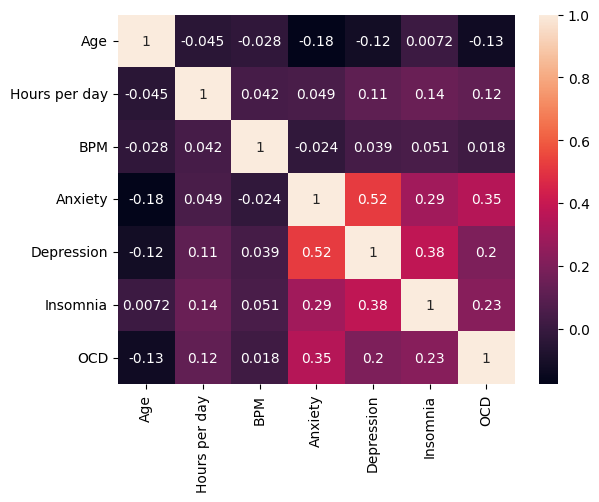

In [35]:
sb.heatmap(dfcopy.corr(numeric_only=True), annot=True)
plt.show()

In [52]:
dfcopy.nunique()

Age                              61
Primary streaming service         6
Hours per day                    27
While working                     2
Instrumentalist                   2
Composer                          2
Fav genre                        16
Exploratory                       2
Foreign languages                 2
BPM                             135
Frequency [Classical]             4
Frequency [Country]               4
Frequency [EDM]                   4
Frequency [Folk]                  4
Frequency [Gospel]                4
Frequency [Hip hop]               4
Frequency [Jazz]                  4
Frequency [K pop]                 4
Frequency [Latin]                 4
Frequency [Lofi]                  4
Frequency [Metal]                 4
Frequency [Pop]                   4
Frequency [R&B]                   4
Frequency [Rap]                   4
Frequency [Rock]                  4
Frequency [Video game music]      4
Anxiety                          12
Depression                  

In [84]:
#check for duplicate values
dfcopy.duplicated().sum()

0

## There are no duplicate

# We are now going to check for categorical feaures in our dataset.

In [51]:
df.describe(include='object')

,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects,Permissions
count,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736
unique,6,2,2,2,16,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,1
top,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,Never,Never,Never,Sometimes,Never,Never,Never,Never,Never,Very frequently,Never,Rarely,Very frequently,Never,Improve,I understand.
freq,459,581,501,610,188,525,406,259,343,307,292,535,218,261,416,443,280,264,277,225,215,330,236,542,736


## This doesn't make much sence hence we will proceed with our numerical features.

In [ ]:
# The Data is clean, let us proceed to Splitting the data